**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(yhat^{(i)}, y^{(i)}) =  - y^{(i)}  \log(yhat^{(i)}) - (1-y^{(i)} )  \log(1-yhat^{(i)})\tag{3}$$

The cost is then computing:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(yhat^{(i)}, y^{(i)})\tag{6}$$

Gradient Computing:
- $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(yhat-Y)^T\tag{7}$$
- $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (yhat^{(i)}-y^{(i)})\tag{8}$$


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
A = np.random.randn(3,2)

B = np.sum(A, axis = 1, keepdims = True) 

In [3]:
B.shape

(3, 1)

## Weight and bias initializer

In [4]:
def w_b_init(dim: int):
    w = tf.zeros([dim, 1], dtype=tf.float64)
    b = 0.0
    return w, b


In [5]:
w, b = w_b_init(3)
w, b


(<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
 array([[0.],
        [0.],
        [0.]])>,
 0.0)

## Calculate $z$ for all $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

In [6]:
def z_calc(w: tf.Tensor, b: tf.float64, x: tf.Tensor):
    z = tf.tensordot(tf.transpose(w), x, axes=1) + b
    return z


In [7]:
w , b = w_b_init(3)
x = tf.Variable([3, 2, 4], dtype=tf.float64)
z_calc(w, b, x)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>

# Sigmoid Funtion
compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp() or tf.exp().

In [8]:
def sigmoid(z: tf.Tensor) -> tf.Tensor:
    s = 1/(1 + tf.exp(-z))
    return s

In [9]:
z = z_calc(w, b, x)
sigmoid(z)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.5])>

## Calculate the Cost :
 $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(yhat^{(i)})+(1-y^{(i)})\log(1-yhat^{(i)}))$

In [10]:
def cost(yhat:tf.Tensor, y:tf.Tensor):
    loss = tf.reduce_sum((y * tf.math.log(yhat)) + ((1-y) * tf.math.log(1-yhat)))
    c = (-1/yhat.shape[0]) * loss
    return c

## Forward Propagation:
- You get X
- You compute $yhat = \sigma(w^T X + b) $
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(yhat^{(i)})+(1-y^{(i)})\log(1-yhat^{(i)}))$

In [11]:
def forward_propagation(w: tf.Tensor, b: tf.float64, x: tf.Tensor, y: tf.Tensor):
    z = z_calc(w, b, x)
    yhat = sigmoid(z)
    c = cost(yhat, y)
    return yhat, tf.squeeze(c)


## Back Propagation: 

- $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(yhat-y)^T\tag{7}$$
- $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (yhat^{(i)}-y^{(i)})\tag{8}$$

In [12]:
def back_propagation(x: tf.Tensor, y: tf.Tensor, yhat: tf.Tensor):
    m = y.shape[0]
    dw = (1/m) * tf.tensordot(x, tf.transpose(yhat - y), axes=1)
    db = (1/m) * tf.reduce_sum(yhat - y)
    return {'dw': dw, 'db': db}


# Optimizer

In [13]:
def optimize(w, b, x, y, num_iterations=100, learning_rate=0.009):

    for epoch in range(num_iterations):
        yhat, loss = forward_propagation(w, b, x, y)
        grads = back_propagation(x, y, yhat)
        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} => Loss: {loss}")
    return w, b, grads, loss


In [14]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
optimize(w, b, X, Y, num_iterations=1000, learning_rate = 0.009)

Epoch: 0 => Loss: 0.47701613123077213
Epoch: 10 => Loss: 0.4164531274535226
Epoch: 20 => Loss: 0.367523498948689
Epoch: 30 => Loss: 0.3275456740982752
Epoch: 40 => Loss: 0.2945102061378818
Epoch: 50 => Loss: 0.26691094275228944
Epoch: 60 => Loss: 0.24361332072642702
Epoch: 70 => Loss: 0.2237560544308519
Epoch: 80 => Loss: 0.20667926683465648
Epoch: 90 => Loss: 0.19187237397489834
Epoch: 100 => Loss: 0.17893631895908704
Epoch: 110 => Loss: 0.167556102524381
Epoch: 120 => Loss: 0.15748067635971635
Epoch: 130 => Loss: 0.14850811044843798
Epoch: 140 => Loss: 0.14047455659043903
Epoch: 150 => Loss: 0.13324596273006736
Epoch: 160 => Loss: 0.12671179611607164
Epoch: 170 => Loss: 0.12078024571170254
Epoch: 180 => Loss: 0.1153745232473739
Epoch: 190 => Loss: 0.11042998727123679
Epoch: 200 => Loss: 0.10589188895569433
Epoch: 210 => Loss: 0.10171359152781864
Epoch: 220 => Loss: 0.09785515338863691
Epoch: 230 => Loss: 0.09428219267242786
Epoch: 240 => Loss: 0.0909649712233753
Epoch: 250 => Loss: 0

(<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[-0.23587415],
        [ 2.44161554]])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.101151936178372>,
 {'dw': <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
  array([[ 0.03980444],
         [-0.02466517]])>,
  'db': <tf.Tensor: shape=(), dtype=float64, numpy=-0.01797094547599213>},
 <tf.Tensor: shape=(), dtype=float64, numpy=0.026563690163066245>)

# Model
- Initialize $$ w,b $$
- Forward Propagation:
    - You get X
    - You compute $yhat = \sigma(w^T X + b) $
    - You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(yhat^{(i)})+(1-y^{(i)})\log(1-yhat^{(i)}))$
- Back Propagation: 
    - $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(yhat-y)^T\tag{7}$$
    - $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (yhat^{(i)}-y^{(i)})\tag{8}$$
- Update weights:
    - $$ w = w - {\alpha} * \frac{\partial J}{\partial w} $$
    - $$ b = b- {\alpha}  * \frac{\partial J}{\partial b} $$

In [15]:
class Model:
    def __init__(self, dim: int):
        self.w, self.b = tf.random.normal(
            [dim, 1], dtype=tf.float64, seed=42), 0.0
        self.params = dict()
        self.cost = None
        self.losses = list()
        self.metric = [[0.0, ], [0.0, ]]

    def forward(self, x: tf.Tensor):
        z = tf.tensordot(tf.transpose(self.w), x, axes=1) + self.b
        return 1/(1 + tf.exp(-z))

    def forward_propagation(self, w: tf.Tensor, b: tf.float64, x: tf.Tensor, y: tf.Tensor):
        yhat = self.forward(x)
        loss = tf.reduce_sum((y * tf.math.log(yhat)) +
                             ((1-y) * tf.math.log(1-yhat)))
        cost = (-1/y.shape[0]) * loss
        return yhat, tf.squeeze(cost)

    def back_propagation(self, x: tf.Tensor, y: tf.Tensor, yhat: tf.Tensor):
        m = y.shape[0]
        dw = (1/m) * tf.tensordot(x, tf.transpose(yhat - y), axes=1)
        db = (1/m) * tf.reduce_sum(yhat - y)
        return {'dw': dw, 'db': db}

    def evaluate(self, ytrain, ytrain_pred, ytest, ytest_pred):
        train_acc = 100 - np.mean(np.abs(ytrain_pred - ytrain)) * 100
        test_acc = 100 - np.mean(np.abs(ytest_pred - ytest)) * 100
        return train_acc, test_acc

    def optimize(self, x, y, validation=None, num_iterations=100, learning_rate=0.009):
        for epoch in range(num_iterations):
            yhat, self.cost = self.forward_propagation(
                self.w, self.b, x, y)
            grads = self.back_propagation(x, y, yhat)
            self.w = self.w - learning_rate * grads['dw']
            self.b = self.b - learning_rate * grads['db']
            self.losses.append(self.cost)
            if epoch % 10 == 0:
                ytest_pred = self.predict(validation[0])
                train_acc, test_acc = self.evaluate(
                    y, tf.round(yhat), validation[1], ytest_pred)
                print(
                    f"Epoch: {epoch} => Train Accuraccy: {train_acc:.2f}% || Test Accuracy:{test_acc:.2f}% || Loss: {self.cost}")
                self.metric[0].append(train_acc)
                self.metric[1].append(test_acc)
        self.params['w'] = self.w
        self.params['b'] = self.b
        return self.w, self.b, grads, self.cost

    def predict(self, x: tf.Tensor):
        return tf.round(self.forward(x))


In [16]:
X = tf.Variable([
    [1., -2., -1., 3.4],
    [3., 0.5, -3.2, 2.5]
], dtype=tf.float64)
Y = np.array([1, 1, 0, 1])
xv = tf.Variable([
    [-1.3, 3.1],
    [-3.6, 2.1]
], dtype=tf.float64)
yv = np.array([0, 1])
model = Model(2)
model.optimize(X, Y, validation=(xv, yv), num_iterations=100)

Epoch: 0 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 1.315912193032579
Epoch: 10 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 1.130260498619716
Epoch: 20 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 0.9856022946926002
Epoch: 30 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 0.8726790689316903
Epoch: 40 => Train Accuraccy: 50.00% || Test Accuracy:100.00% || Loss: 0.7836236894709461
Epoch: 50 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.7122113259589877
Epoch: 60 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.653783792902152
Epoch: 70 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.6049739804328483
Epoch: 80 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.5633875293801394
Epoch: 90 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.5273272263749174


(<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[0.67251638],
        [0.15194723]])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.19555566275624162>,
 {'dw': <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
  array([[ 0.20437155],
         [-0.50945549]])>,
  'db': <tf.Tensor: shape=(), dtype=float64, numpy=-0.18376851092327232>},
 <tf.Tensor: shape=(), dtype=float64, numpy=0.4985905148418581>)

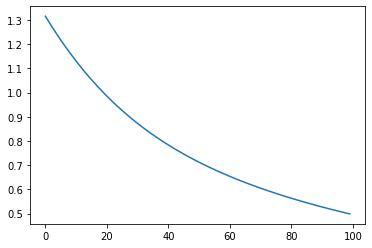

In [17]:
plt.plot(model.losses)

# Test Model

In [18]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
x, y = datasets.load_breast_cancer(return_X_y=True)
x = StandardScaler().fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, random_state=33, test_size=0.3
)


In [20]:
xtrain = tf.Variable(xtrain.T, dtype=tf.float64)
xtest = tf.Variable(xtest.T, dtype=tf.float64)


In [21]:
model = Model(xtrain.shape[0])
model.optimize(xtrain, ytrain, validation=(xtest, ytest),
               num_iterations=5000, learning_rate=0.001)


Epoch: 0 => Train Accuraccy: 20.35% || Test Accuracy:22.81% || Loss: 4.673907349138036
Epoch: 10 => Train Accuraccy: 20.60% || Test Accuracy:23.39% || Loss: 4.610840534485748
Epoch: 20 => Train Accuraccy: 20.85% || Test Accuracy:23.98% || Loss: 4.548237367216999
Epoch: 30 => Train Accuraccy: 20.85% || Test Accuracy:23.98% || Loss: 4.486076032546552
Epoch: 40 => Train Accuraccy: 21.36% || Test Accuracy:23.98% || Loss: 4.4244155631487585
Epoch: 50 => Train Accuraccy: 21.86% || Test Accuracy:24.56% || Loss: 4.36321941987452
Epoch: 60 => Train Accuraccy: 22.11% || Test Accuracy:25.15% || Loss: 4.302535794281704
Epoch: 70 => Train Accuraccy: 22.36% || Test Accuracy:25.73% || Loss: 4.242339023295303
Epoch: 80 => Train Accuraccy: 22.86% || Test Accuracy:26.32% || Loss: 4.182657266027158
Epoch: 90 => Train Accuraccy: 22.86% || Test Accuracy:26.32% || Loss: 4.123491579346591
Epoch: 100 => Train Accuraccy: 22.86% || Test Accuracy:26.32% || Loss: 4.0648501188421085
Epoch: 110 => Train Accuraccy: 

(<tf.Tensor: shape=(30, 1), dtype=float64, numpy=
 array([[ 0.01202555],
        [-0.12073776],
        [-2.57376662],
        [ 0.9314192 ],
        [ 0.02250823],
        [-0.07088151],
        [-0.52228708],
        [ 0.44812821],
        [ 0.19276412],
        [ 0.52171078],
        [-0.27829762],
        [-0.93028466],
        [ 0.45459687],
        [ 0.02204154],
        [ 1.45012121],
        [-1.51643219],
        [ 0.25083488],
        [ 1.0496372 ],
        [-0.73458509],
        [-0.33740646],
        [-0.28372685],
        [-0.97666384],
        [-1.61622363],
        [-1.70586701],
        [-0.18739892],
        [ 1.81363319],
        [-0.46015321],
        [-0.03206563],
        [ 0.81100565],
        [-3.65905586]])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.35088333376210823>,
 {'dw': <tf.Tensor: shape=(30, 1), dtype=float64, numpy=
  array([[ 0.0432324 ],
         [-0.01266052],
         [ 0.04183334],
         [ 0.04212303],
         [ 0.04794096],
         [ 0.0

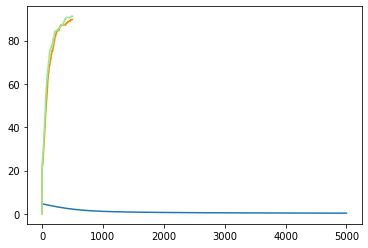

In [22]:
plt.figure()
plt.plot(model.losses)
plt.plot(model.metric[0], color='darkorange')
plt.plot(model.metric[1], color='lightgreen')
plt.show()

In [23]:
model.params


{'w': <tf.Tensor: shape=(30, 1), dtype=float64, numpy=
 array([[ 0.01202555],
        [-0.12073776],
        [-2.57376662],
        [ 0.9314192 ],
        [ 0.02250823],
        [-0.07088151],
        [-0.52228708],
        [ 0.44812821],
        [ 0.19276412],
        [ 0.52171078],
        [-0.27829762],
        [-0.93028466],
        [ 0.45459687],
        [ 0.02204154],
        [ 1.45012121],
        [-1.51643219],
        [ 0.25083488],
        [ 1.0496372 ],
        [-0.73458509],
        [-0.33740646],
        [-0.28372685],
        [-0.97666384],
        [-1.61622363],
        [-1.70586701],
        [-0.18739892],
        [ 1.81363319],
        [-0.46015321],
        [-0.03206563],
        [ 0.81100565],
        [-3.65905586]])>,
 'b': <tf.Tensor: shape=(), dtype=float64, numpy=0.35088333376210823>}

In [24]:
model.predict(xtest)[0] == ytest

<tf.Tensor: shape=(171,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, Fal

In [25]:
model.metric

[[0.0,
  20.35175879396985,
  20.603015075376888,
  20.85427135678391,
  20.85427135678391,
  21.356783919597987,
  21.859296482412063,
  22.110552763819086,
  22.36180904522614,
  22.8643216080402,
  22.8643216080402,
  22.8643216080402,
  22.8643216080402,
  23.618090452261313,
  24.120603015075375,
  25.125628140703512,
  25.376884422110564,
  25.628140703517587,
  25.628140703517587,
  26.130653266331663,
  26.63316582914574,
  26.884422110552762,
  27.1356783919598,
  27.63819095477386,
  28.391959798994975,
  28.643216080402013,
  28.894472361809036,
  29.64824120603015,
  30.402010050251263,
  31.4070351758794,
  31.4070351758794,
  31.4070351758794,
  31.909547738693462,
  32.1608040201005,
  33.16582914572864,
  33.417085427135675,
  33.91959798994975,
  34.92462311557789,
  34.92462311557789,
  34.92462311557789,
  35.42713567839196,
  35.929648241206024,
  36.18090452261307,
  36.68341708542714,
  37.1859296482412,
  37.437185929648244,
  38.19095477386934,
  38.944723618090